# Ceneo Analyzer

## Biblioteki

In [9]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Lista kodów produktów, o których mamy pobrane opinie

In [2]:
print(*[filename.split('.')[0] for filename in  os.listdir("opinions")], sep="\n")

114700014


## Kod produktu, którego opinie mają zostać przeanalizowane

In [3]:
product_id = input("Proszę podać kod produktu z serwisu Ceneo.pl: ")

## Wczytanie do obiektu pandas.DataFrame opinii o wskazanym produkcie

In [4]:
opinions = pd.read_json(f"opinions/{product_id}.json")
opinions

,opinion_id,author,recommendation,rating,content,pros,cons,useful,useless,post_date,purchase_date
0,18536064,A...t,Polecam,5/5,"Długo szukałam, sporo filmików na YT o ujrzała...",[],[],0,0,2024-03-29 11:14:23,2024-03-17 13:45:25
1,17516357,g...a,Polecam,5/5,"Fantastyczny sprzęt, bardzo mocny, lekki i odp...","[dużo końcówek, poręczny, przycisk zasilania, ...",[],0,2,2023-05-17 10:52:54,2023-05-12 09:57:19
2,18499460,j...k,Polecam,4/5,Odkurzacz spełnia wymagania,"[dużo końcówek, poręczny, przycisk zasilania, ...",[],1,0,2024-03-18 08:42:26,2024-03-10 15:49:13
3,18457506,n...2,Polecam,5/5,Produkt super,"[dużo końcówek, lekki, poręczny, przycisk zasi...",[],0,0,2024-03-04 08:34:36,2024-02-17 16:31:32
4,16459243,l...i,Polecam,5/5,Mam w domu psa który zrzuca non stop dużo sier...,"[dużo końcówek, poręczny, przycisk zasilania, ...",[],2,0,2022-08-26 11:17:23,2022-08-21 20:00:27
...,...,...,...,...,...,...,...,...,...,...,...
177,17545591,J...2,Polecam,5/5,Ok,[],[],0,0,2023-05-25 07:24:58,2023-05-07 16:04:38
178,17448760,b...r,Polecam,5/5,ok,"[dużo końcówek, lekki, poręczny, przycisk zasi...",[],0,0,2023-04-26 21:03:39,2023-04-23 10:00:47
179,18125745,t...l,Nie polecam,"2,5/5","Odkurza dobrze, niestety bardzo szybko rozłado...","[lekki, poręczny, przycisk zasilania, wyświetl...",[wytrzymała bateria],0,0,2023-11-22 12:40:45,2023-11-10 10:24:44
180,15826211,Użytkownik Ceneo,Polecam,5/5,"Odkurzacz mały, poręczny przy tym posiada bard...","[lekki, poręczny, przycisk zasilania, wyświetl...",[],0,0,2022-03-15 20:58:40,None


## Podstawowe statystyki zbioru opinii

In [5]:
opinions.rating = opinions.rating.apply(lambda x: x.split('/')[0].replace(",", "."), ).astype(float)

In [6]:
opinions_count = opinions.index.size
pros_count = opinions.pros.apply(lambda p: 1 if p else 0).sum()
cons_count = opinions.cons.apply(lambda c: 1 if c else 0).sum()
average_rating = opinions.rating.mean()


## Histogram częstości poszczególnych ocen produktu

In [16]:
rating_distribution = opinions.rating.value_counts().reindex(np.arange(0, 5.5, 0.5), fill_value=0)
rating_distribution

rating
0.0      0
0.5      0
1.0      2
1.5      0
2.0      0
2.5      1
3.0      1
3.5      2
4.0     11
4.5     18
5.0    147
Name: count, dtype: int64

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '11'),
 Text(0, 0, '18'),
 Text(0, 0, '147')]

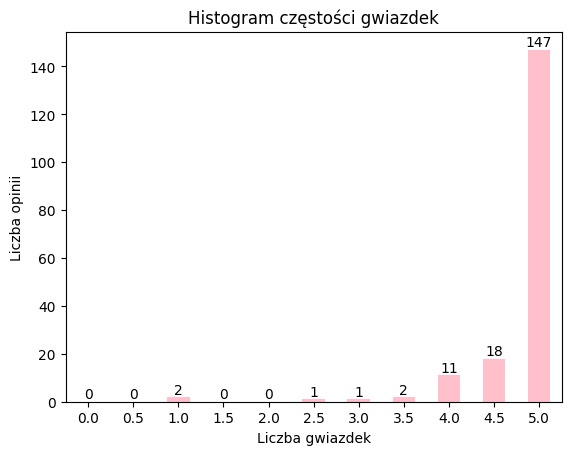

In [23]:
fig, ax = plt.subplots()
rating_distribution.plot.bar(color='pink')
plt.title('Histogram częstości gwiazdek')
plt.xlabel('Liczba gwiazdek')
plt.ylabel('Liczba opinii')
plt.xticks(rotation=0)
plt.bar_label(ax.containers[0], label_type='edge')